# Data Import & Data Cleaning
## Dataset Used:
https://www.kaggle.com/lepchenkov/usedcarscatalog

In [50]:
import numpy as np
import pandas as pd
df = pd.read_csv("cars.csv")
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


## Step 1:Basic Data Quality Checks

In [51]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [52]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [53]:
print(df.shape)

(38531, 29)


## We dont know what the features (0 to 9) are for. Hence dropping these features.

In [54]:
df = df.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7,7


In [55]:
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
number_of_photos      0
up_counter            0
duration_listed       0
dtype: int64

## Also Dropping Rows having 1 or more null values

In [56]:
df = df.dropna()

In [57]:
print(df.shape)

(38521, 19)





## Performing some Data Transformation

In [58]:
df["engine_has_gas"]=df["engine_has_gas"].astype(int)
df["has_warranty"]=df["has_warranty"].astype(int)
df["is_exchangeable"]=df["is_exchangeable"].astype(int)

In [59]:
# df.to_csv(r'C:\Users\abhis\Desktop\DS Mini-Project\cars_data.csv',index = False)

In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## Scatter plot 

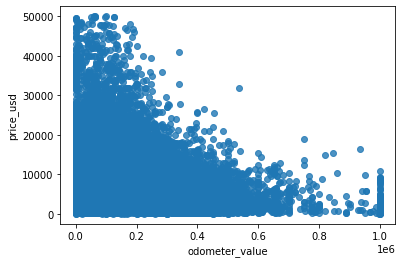

In [61]:
sns.regplot(x="odometer_value",y="price_usd",data=df,fit_reg=False)

## Scatter plot 
### Emergency means the car has been damaged, sometimes severely.

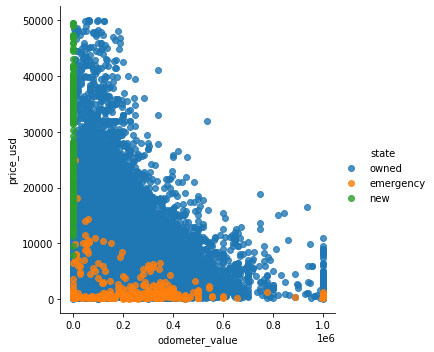

In [62]:
sns.lmplot(x="odometer_value",y="price_usd",data=df,hue="state",fit_reg=False)

## Barplot for Engine_fuel Types (Categorical)

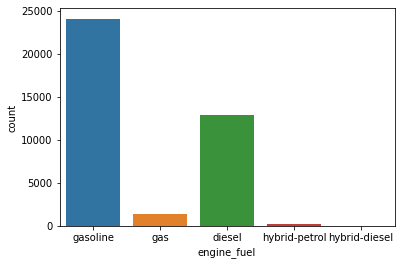

In [63]:
sns.countplot(data=df,x="engine_fuel")

## Boxplot to Check Which type of Engine falls in which Price range

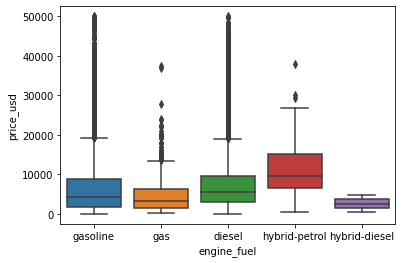

In [64]:
sns.boxplot(x="engine_fuel",y="price_usd",data=df)

## Calculate the age of the car



In [65]:
df['age'] = 2020 - df['year_produced']
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,age
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,0,gasoline,2.5,universal,0,owned,all,10900.00,0,9,13,16,10
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,0,gasoline,3.0,universal,0,owned,all,5000.00,1,12,54,83,18
2,Subaru,Forester,automatic,red,402000,2001,gasoline,0,gasoline,2.5,suv,0,owned,all,2800.00,1,4,72,151,19
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,0,gasoline,3.0,sedan,0,owned,all,9999.00,1,9,42,86,21
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,0,gasoline,2.5,universal,0,owned,all,2134.11,1,14,7,7,19


## All numeric (float and int) variables in the dataset

In [66]:
cars_numeric = df.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,age
0,190000,2010,2.5,10900.00,9,13,16,10
1,290000,2002,3.0,5000.00,12,54,83,18
2,402000,2001,2.5,2800.00,4,72,151,19
3,10000,1999,3.0,9999.00,9,42,86,21
4,280000,2001,2.5,2134.11,14,7,7,19


## Correlation matrix

In [67]:

mat = cars_numeric.corr()
mat

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,age
odometer_value,1.000000,-0.488448,0.105704,-0.420965,-0.143564,-0.020976,-0.000508,0.488448
year_produced,-0.488448,1.000000,0.005059,0.705439,0.258064,0.007963,-0.016916,-1.000000
engine_capacity,0.105704,0.005059,1.000000,0.296597,0.106691,0.079152,0.080081,-0.005059
price_usd,-0.420965,0.705439,0.296597,1.000000,0.316879,0.057470,0.033662,-0.705439
number_of_photos,-0.143564,0.258064,0.106691,0.316879,1.000000,0.073880,-0.028181,-0.258064
up_counter,-0.020976,0.007963,0.079152,0.057470,0.073880,1.000000,0.698128,-0.007963
duration_listed,-0.000508,-0.016916,0.080081,0.033662,-0.028181,0.698128,1.000000,0.016916
age,0.488448,-1.000000,-0.005059,-0.705439,-0.258064,-0.007963,0.016916,1.000000


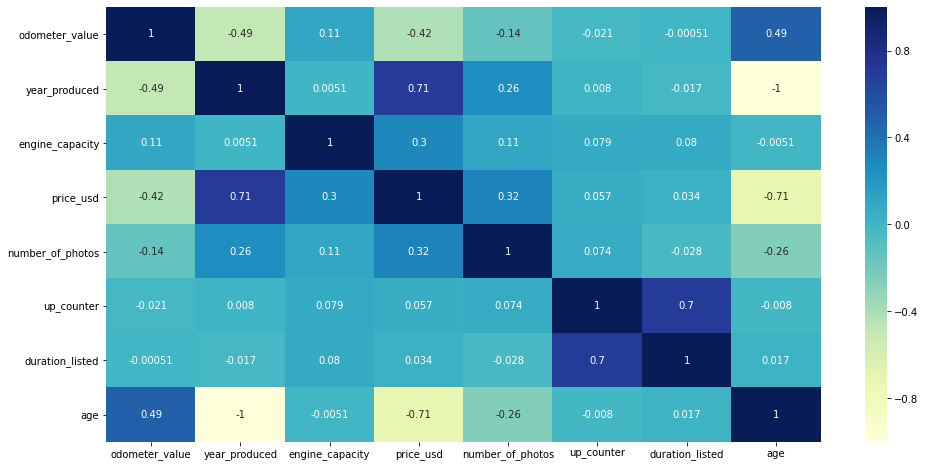

In [68]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(mat, cmap="YlGnBu", annot=True)
plt.show()

### Here we can see that "Year Produced" or "age" has highest correlation with the Price of the car.

### Also it is correlated with Odometer Value, Number of photos uploaded by user, and engine capacity.

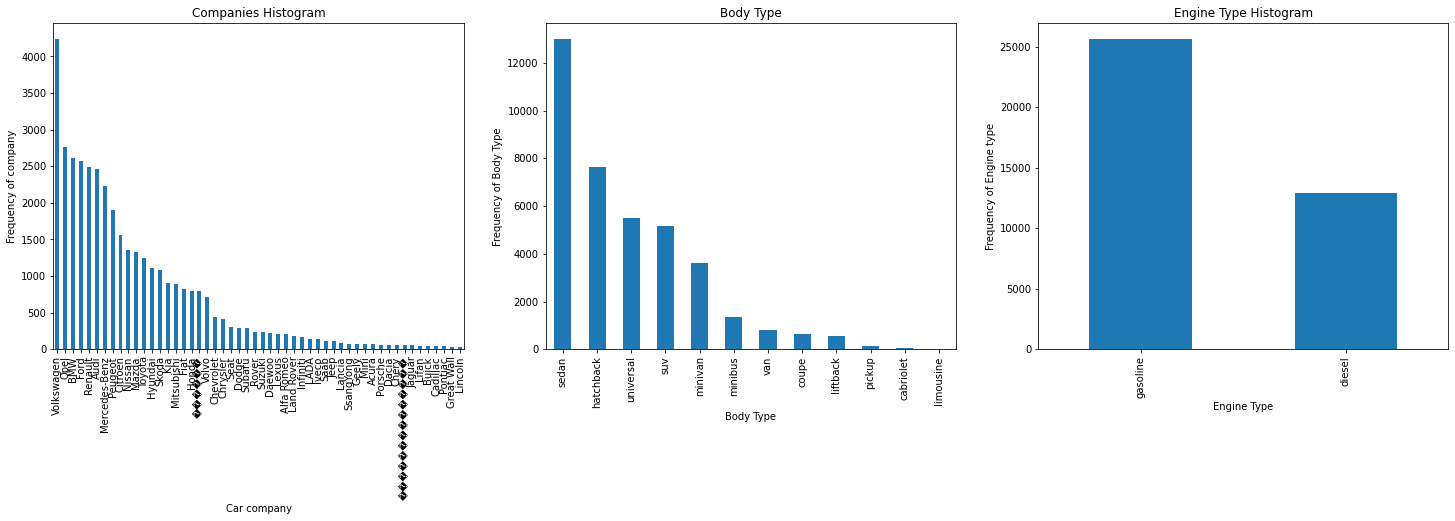

In [69]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.manufacturer_name.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.body_type.value_counts().plot(kind='bar')
plt.title('Body Type')
plt1.set(xlabel = 'Body Type', ylabel='Frequency of Body Type')

plt.subplot(1,3,3)
plt1 = df.engine_type.value_counts().plot(kind='bar')
plt.title('Engine Type Histogram')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine type')

plt.show()

## Inference:
### 1. Volkswagen is preffered than other cars.
### 2. Sedan seems to be the popular type.
### 3. Vehicles with gasoline are preffered.

<Figure size 2160x720 with 0 Axes>

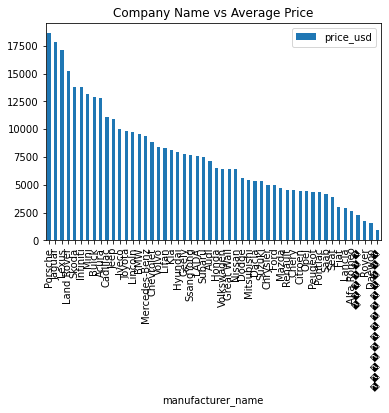

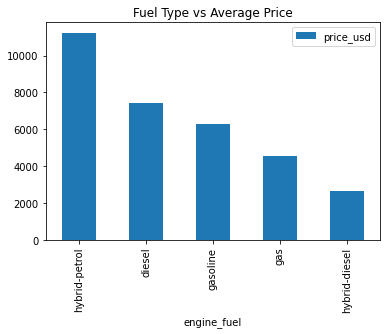

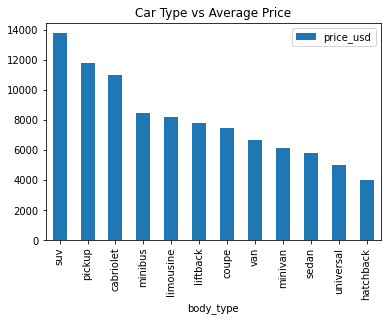

In [70]:
plt.figure(figsize=(30, 10))

df2 = pd.DataFrame(df.groupby(['manufacturer_name'])['price_usd'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df2 = pd.DataFrame(df.groupby(['engine_fuel'])['price_usd'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df2 = pd.DataFrame(df.groupby(['body_type'])['price_usd'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

## Inference:

- 1. Porsche and Jaguar seems to have highest average price.
- 2. Hybrid vehicles have high average price than both Diesel and Gasoline vehicles.
- 3. SUV has the highest average price.

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## Binning Companies based on Average Price

> We have around 45 different Car Manufacturing Companies with Different Model Names. If we create dummy variables for all these names, it will result in large number of coulmns which is not feasible for model building. Hence, we will try and create different groups based on Average Price of the cars.

In [71]:
df['price_usd'] = df['price_usd'].astype('float64')
temp = df.copy()

table = temp.groupby(['manufacturer_name'])['price_usd'].mean()
temp = temp.merge(table.reset_index(), how='left', on='manufacturer_name')
bins = [0,10000,25000,50000]
cars_bins = ['Budget','Medium', 'Highend']

In [72]:
temp.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,has_warranty,state,drivetrain,price_usd_x,is_exchangeable,number_of_photos,up_counter,duration_listed,age,price_usd_y
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,0,gasoline,2.5,...,0,owned,all,10900.00,0,9,13,16,10,7522.094605
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,0,gasoline,3.0,...,0,owned,all,5000.00,1,12,54,83,18,7522.094605
2,Subaru,Forester,automatic,red,402000,2001,gasoline,0,gasoline,2.5,...,0,owned,all,2800.00,1,4,72,151,19,7522.094605
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,0,gasoline,3.0,...,0,owned,all,9999.00,1,9,42,86,21,7522.094605
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,0,gasoline,2.5,...,0,owned,all,2134.11,1,14,7,7,19,7522.094605


In [73]:
df['CarRange'] = pd.cut(temp['price_usd_y'], bins,  right=False, labels=cars_bins)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,age,CarRange
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,0,gasoline,2.5,...,0,owned,all,10900.00,0,9,13,16,10,Budget
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,0,gasoline,3.0,...,0,owned,all,5000.00,1,12,54,83,18,Budget
2,Subaru,Forester,automatic,red,402000,2001,gasoline,0,gasoline,2.5,...,0,owned,all,2800.00,1,4,72,151,19,Budget
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,0,gasoline,3.0,...,0,owned,all,9999.00,1,9,42,86,21,Budget
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,0,gasoline,2.5,...,0,owned,all,2134.11,1,14,7,7,19,Budget


### We will leave out variables like "manufacturer_name","model_name".
### We will be using CarsRange variable instead of these as discussed above.

In [74]:
cars_new = df[['transmission','color','odometer_value','engine_fuel','engine_has_gas','engine_type','engine_capacity','body_type'
                , 'has_warranty','state','drivetrain','is_exchangeable','number_of_photos', 'up_counter','duration_listed', 'age','CarRange','price_usd']]
cars_new.head()

,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,is_exchangeable,number_of_photos,up_counter,duration_listed,age,CarRange,price_usd
0,automatic,silver,190000,gasoline,0,gasoline,2.5,universal,0,owned,all,0,9,13,16,10,Budget,10900.00
1,automatic,blue,290000,gasoline,0,gasoline,3.0,universal,0,owned,all,1,12,54,83,18,Budget,5000.00
2,automatic,red,402000,gasoline,0,gasoline,2.5,suv,0,owned,all,1,4,72,151,19,Budget,2800.00
3,mechanical,blue,10000,gasoline,0,gasoline,3.0,sedan,0,owned,all,1,9,42,86,21,Budget,9999.00
4,automatic,black,280000,gasoline,0,gasoline,2.5,universal,0,owned,all,1,14,7,7,19,Budget,2134.11


### Define a function to generate dummy variables and merging it with data frame

In [75]:
def dummies(x,df1):
    temp = pd.get_dummies(df[[x]], drop_first=True)
    df1 = pd.concat([df1,temp], axis=1)
    df1.drop([x], axis=1, inplace=True)
    return df1

# Apply function to the cars_new df
cars_new = dummies('transmission', cars_new)
cars_new = dummies('color', cars_new)
cars_new = dummies('engine_fuel', cars_new)
cars_new = dummies('engine_has_gas', cars_new)
cars_new = dummies('engine_type', cars_new)
cars_new = dummies('body_type', cars_new)
cars_new = dummies('has_warranty', cars_new)
cars_new = dummies('state', cars_new)
cars_new = dummies('drivetrain', cars_new)
cars_new = dummies('is_exchangeable', cars_new)
cars_new = dummies('CarRange', cars_new)

In [76]:
cars_new.head()

,odometer_value,engine_capacity,number_of_photos,up_counter,duration_listed,age,price_usd,transmission_mechanical,color_blue,color_brown,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_new,state_owned,drivetrain_front,drivetrain_rear,CarRange_Medium,CarRange_Highend
0,190000,2.5,9,13,16,10,10900.00,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,290000,3.0,12,54,83,18,5000.00,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,402000,2.5,4,72,151,19,2800.00,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,10000,3.0,9,42,86,21,9999.00,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,280000,2.5,14,7,7,19,2134.11,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [77]:
cars_new.shape

(38521, 41)

# Step 3 : Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(cars_new, train_size=0.7, random_state=42) 

In [79]:
df_train.tail()

,odometer_value,engine_capacity,number_of_photos,up_counter,duration_listed,age,price_usd,transmission_mechanical,color_blue,color_brown,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_new,state_owned,drivetrain_front,drivetrain_rear,CarRange_Medium,CarRange_Highend
6265,300000,1.8,6,4,4,22,820.0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
11286,380000,1.9,5,1,34,22,3200.0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
38168,459186,3.3,7,9,14,15,4900.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
860,77921,2.0,15,24,41,6,14900.0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
15797,296550,1.6,16,1,1,5,6700.0,1,0,0,...,1,0,0,0,0,1,1,0,0,0


In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars= ['odometer_value', 'engine_capacity', 'number_of_photos','up_counter','duration_listed', 'age','price_usd']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\abhis\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [81]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
df_test.tail()

,odometer_value,engine_capacity,number_of_photos,up_counter,duration_listed,age,price_usd,transmission_mechanical,color_blue,color_brown,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_new,state_owned,drivetrain_front,drivetrain_rear,CarRange_Medium,CarRange_Highend
28622,333333,2.8,7,16,84,34,850.0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
22181,321869,4.7,10,44,220,16,14000.0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7603,120000,1.6,1,128,516,6,8000.0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
22551,75000,2.0,9,6,17,12,15000.0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6075,320000,2.2,2,5,14,17,6200.0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


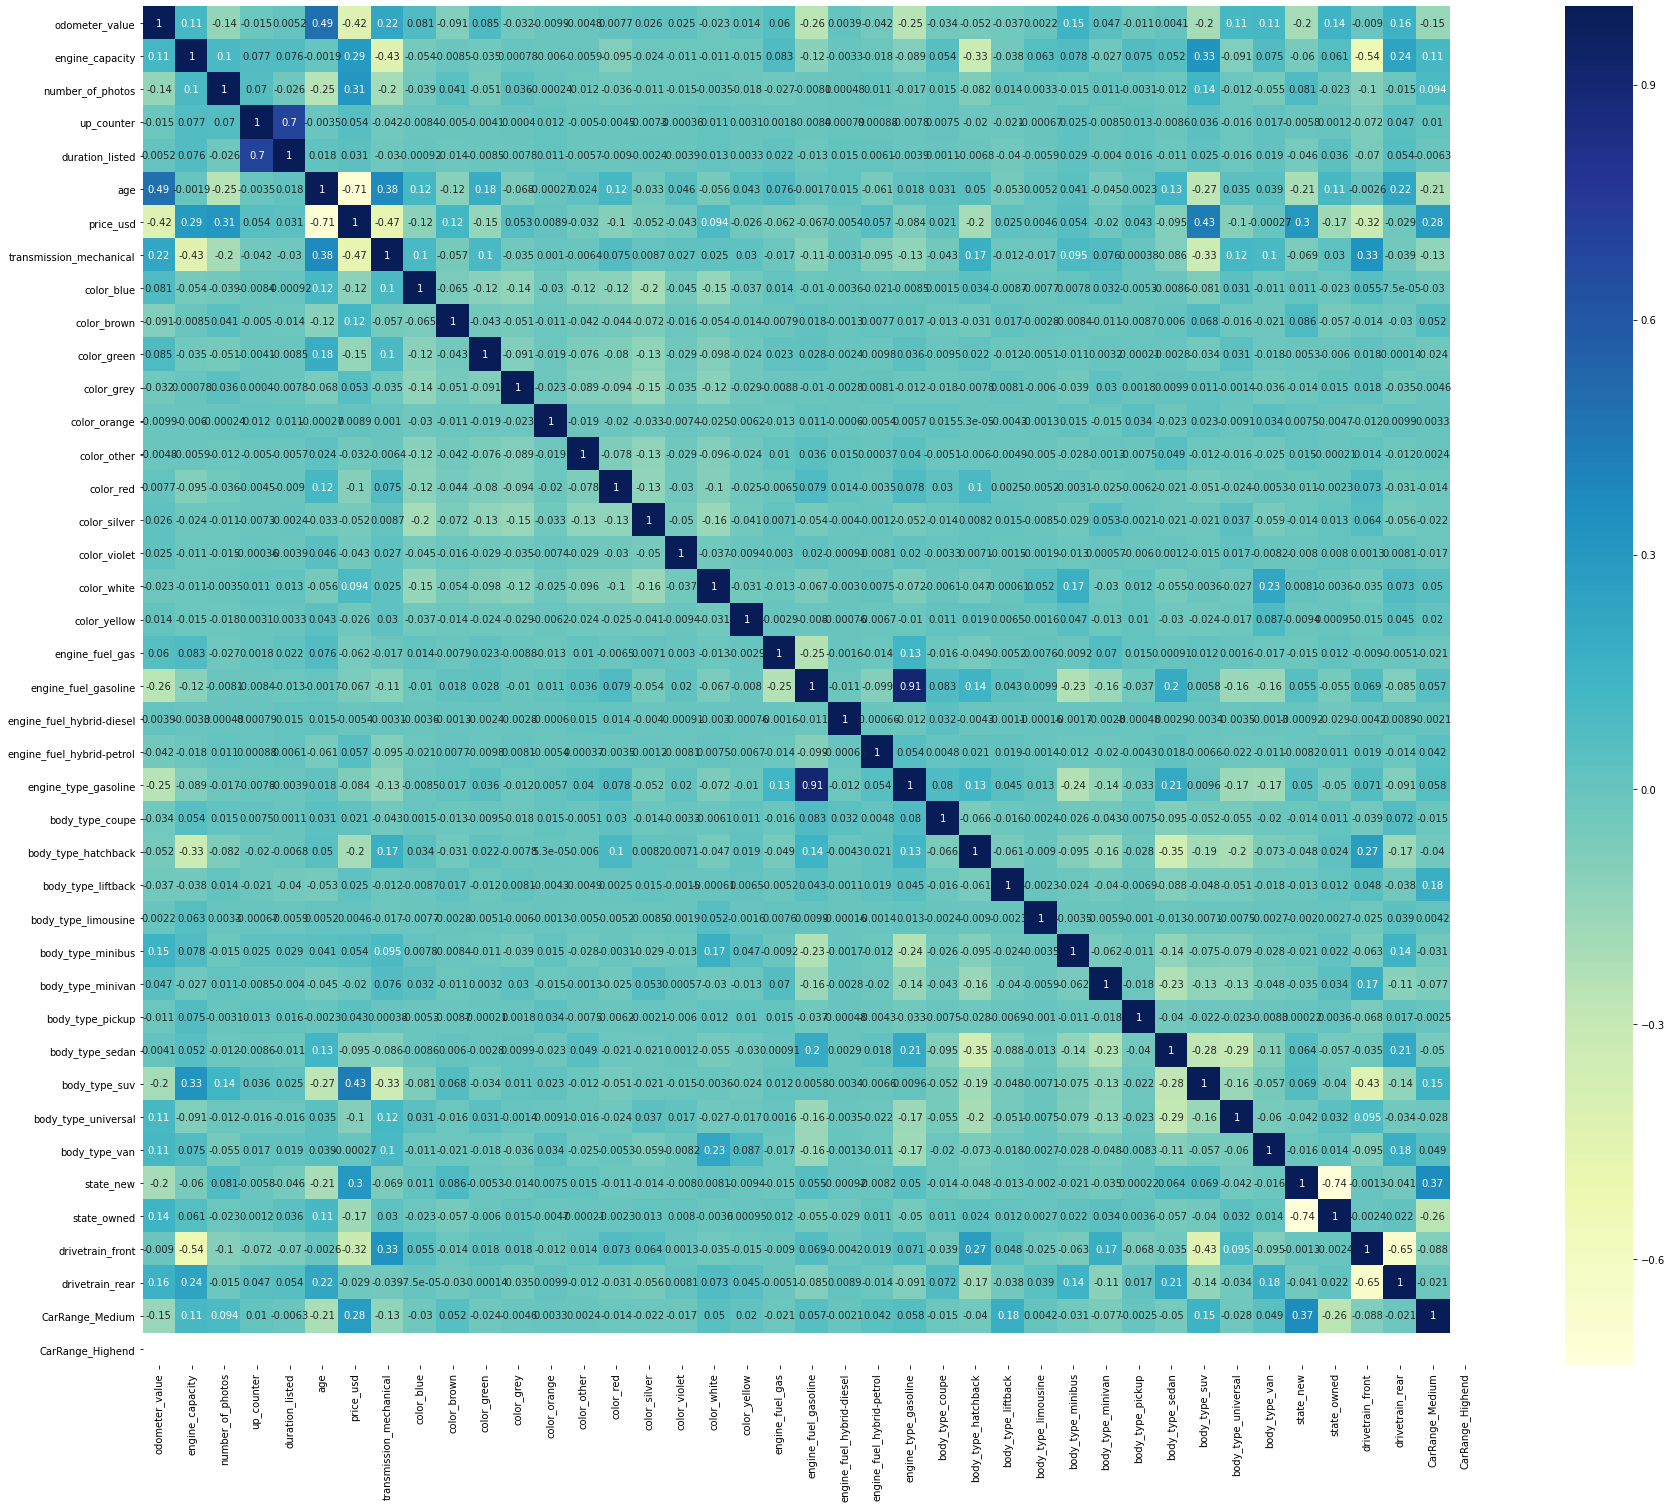

In [83]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

> **Age, Odometer Value, Engine Capacity are some of the high correaltion variables.**

# Step 4 : Model Building

## Model : Linear Regression

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# dividing variables in to X and y
y_train = df_train.pop('price_usd')
X_train = df_train

In [86]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [87]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('odometer_value', True, 1),
 ('engine_capacity', True, 1),
 ('number_of_photos', True, 1),
 ('up_counter', False, 9),
 ('duration_listed', True, 1),
 ('age', True, 1),
 ('transmission_mechanical', False, 10),
 ('color_blue', False, 23),
 ('color_brown', False, 25),
 ('color_green', False, 20),
 ('color_grey', False, 30),
 ('color_orange', False, 28),
 ('color_other', False, 21),
 ('color_red', False, 29),
 ('color_silver', False, 18),
 ('color_violet', False, 22),
 ('color_white', False, 26),
 ('color_yellow', False, 27),
 ('engine_fuel_gas', False, 11),
 ('engine_fuel_gasoline', False, 14),
 ('engine_fuel_hybrid-diesel', False, 17),
 ('engine_fuel_hybrid-petrol', False, 19),
 ('engine_type_gasoline', False, 24),
 ('body_type_coupe', False, 7),
 ('body_type_hatchback', True, 1),
 ('body_type_liftback', False, 4),
 ('body_type_limousine', True, 1),
 ('body_type_minibus', False, 13),
 ('body_type_minivan', False, 3),
 ('body_type_pickup', False, 12),
 ('body_type_sedan', False, 2),
 ('

In [88]:
X_train.columns[rfe.support_]

Index(['odometer_value', 'engine_capacity', 'number_of_photos',
       'duration_listed', 'age', 'body_type_hatchback', 'body_type_limousine',
       'body_type_universal', 'state_new', 'drivetrain_front'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [89]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,odometer_value,engine_capacity,number_of_photos,duration_listed,age,body_type_hatchback,body_type_limousine,body_type_universal,state_new,drivetrain_front
21050,0.237000,0.410959,0.152941,0.009857,0.216667,0,0,1,0,0
29578,0.440000,0.246575,0.058824,0.024194,0.366667,0,0,0,0,0
22650,0.252000,0.164384,0.141176,0.019265,0.183333,1,0,0,0,1
1035,0.196096,0.246575,0.035294,0.036290,0.233333,0,0,0,0,1
9746,0.057300,0.109589,0.023529,0.072581,0.050000,0,0,0,0,1


In [90]:
# Building a model

def build_Lr_model(X,y):
    X = sm.add_constant(X) #add constant
    lm = sm.OLS(y,X).fit() #fit the model
    print(lm.summary())
    return X

def checkingVIF(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [91]:
X_train_1 = build_Lr_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     5494.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:03:34   Log-Likelihood:                 32238.
No. Observations:               26964   AIC:                        -6.445e+04
Df Residuals:                   26953   BIC:                        -6.436e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2718    

C:\Users\abhis\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Building model using statsmodel, for the detailed statistics

In [92]:
checkingVIF(X_train_1)

,features,VIF
0,const,33.16
2,engine_capacity,1.56
10,drivetrain_front,1.46
5,age,1.41
1,odometer_value,1.37
6,body_type_hatchback,1.23
8,body_type_universal,1.10
3,number_of_photos,1.09
9,state_new,1.07
4,duration_listed,1.01


## Decision Tree

In [109]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 
import pandas as pd
import numpy as np

In [110]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,age,CarRange
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,0,gasoline,2.5,...,0,owned,all,10900.00,0,9,13,16,10,Budget
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,0,gasoline,3.0,...,0,owned,all,5000.00,1,12,54,83,18,Budget
2,Subaru,Forester,automatic,red,402000,2001,gasoline,0,gasoline,2.5,...,0,owned,all,2800.00,1,4,72,151,19,Budget
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,0,gasoline,3.0,...,0,owned,all,9999.00,1,9,42,86,21,Budget
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,0,gasoline,2.5,...,0,owned,all,2134.11,1,14,7,7,19,Budget


In [111]:
feature_cols=['odometer_value','engine_has_gas','engine_capacity', 'has_warranty','number_of_photos', 'up_counter','duration_listed', 'age','price_usd']
X=df[feature_cols]
y=df.is_exchangeable

In [112]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [113]:
X_train.dtypes

odometer_value        int64
engine_has_gas        int32
engine_capacity     float64
has_warranty          int32
number_of_photos      int64
up_counter            int64
duration_listed       int64
age                   int64
price_usd           float64
dtype: object

In [114]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [115]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5985117244959764


>**Decision Tree has achieved accuracy of 59.85%**

## Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB

In [119]:
feature_cols=['odometer_value','engine_has_gas','engine_capacity', 'has_warranty','number_of_photos', 'up_counter','duration_listed', 'age','price_usd']
X1=df[feature_cols]
y1=df.is_exchangeable

In [120]:
# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1) # 70% training and 30% test


In [122]:
nb = GaussianNB()
nb.fit(X1_train, y1_train)
accuracy_score(y1_test, nb.predict(X1_test))

0.6394393008566237

>**Naive Bayes has achieved accuracy of 63.94%**